In [ ]:
import re
import pandas as pd
import numpy as np
import math
#import emoji
from collections import Counter
import matplotlib.pyplot as plt
# from PIL import Image
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# Extract Time
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

# Find Authors or Contacts
def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

# Finding Messages
def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        #author = splitmessage[0]
        author = splitmessage[0].split(" ")[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [ ]:
data = []
conversation = 'sample4.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date']=[str(i).split()[0] for i in df['Date']]

#df['Date'] = pd.to_datetime(df['Date'])

data = df.dropna()
index=list(range(1,len(data)+1))
data=data.reindex(index)


#end--- karan
data.to_csv("We.csv")
            

1. Sentiment analysis from chats considering various emojis/words😂
2. Plotting various stats about messages per day/most active users/emojis or
words used frequently/word count/etc.😂
3. Fetching and displaying chats between 2 given intervals
6. author wise sentimental score😂
7. GUI


In [ ]:



#set of authors
author_set = set(data['Author'])

print(author_set)

{'Lakshit', 'KarMa', 'Karan'}


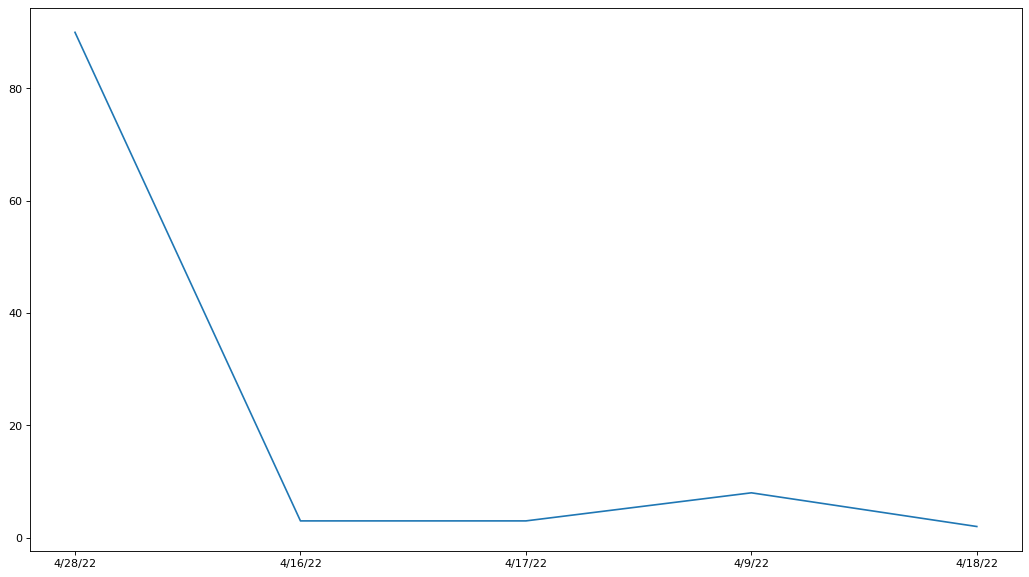

In [ ]:
#msg per day
date_list =[ str(i).split()[0] for i in data['Date']]
date_set = set(date_list)
date_freq = []
for i in date_set:
  date_freq.append(date_list.count(i))
plt.figure(figsize=(16,9),dpi=80)
plt.plot(list(date_set),date_freq)
plt.show()


#plt.figure(figsize=(100,100),dpi=200)
#plt.bar(list(date_set),date_freq)
#plt.show()

{'Karan': 26, 'Lakshit': 28, 'KarMa': 52}


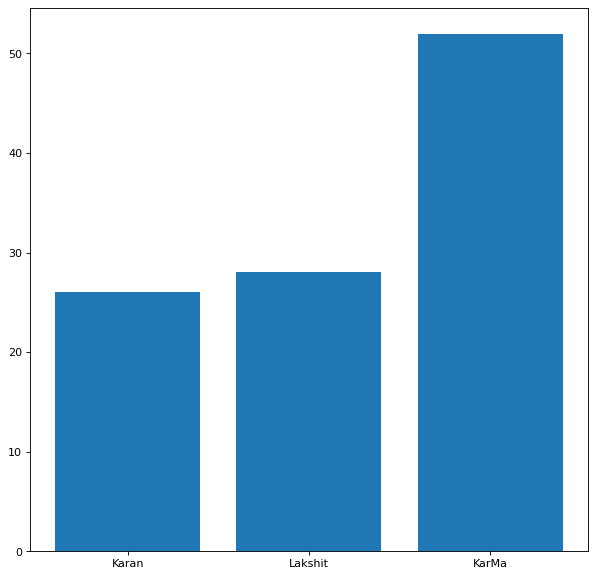

In [ ]:
au_list = list(data['Author'])
d = {}
for i in author_set:
  d[i] = au_list.count(i)
d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}
print(d)
plt.figure(figsize=(9,9),dpi=80)
plt.bar(d.keys(),d.values())
plt.show()

In [ ]:
# data.to_csv("wp.csv")

In [ ]:
#MSGS b/w two given date
"""
from dateutil import parser
date = parser.parse(input("Enter date: "))

#####

date_entry = input('Enter a date in YYYY-MM-DD format')
year, month, day = map(int, date_entry.split('-'))
date1 = datetime.date(year, month, day)

#####

year = int(input('Enter a year'))
month = int(input('Enter a month'))
day = int(input('Enter a day'))
date1 = datetime.date(year, month, day)

#####

from datetime import timedelta, date
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)
start_date = date(2013, 1, 1)
end_date = date(2015, 6, 2)
for single_date in daterange(start_date, end_date):
    print(single_date.strftime("%Y-%m-%d"))
"""
import datetime as dt

#d1 = dt.datetime(int(input("Enter Year : ")),int(input("Enter month : ")),int(input("Enter day : ")))
#d2 = dt.datetime(int(input("Enter Year : ")),int(input("Enter month : ")),int(input("Enter day : ")))

#put this in try block
#assume d1 < de
#len(data) # number of rows in data
#print(str(data.loc[1]['Date']).split()[0])
"""
for i in range(1,len(data['Date'])):
  md= (list(map(int,str(data.loc[1]['Date']).split()[0].split("-")))
  d = dt.datetime(int(md[0]),int(md[1]),int(md[2]))
  if (d1 <= d <= d2):
    print("-".join(md),end=": ")
    print(data.loc[i]['Author'],end=": ")
    print(data.loc[i]['Message'])
"""
d1=dt.datetime(2022,1,1)
d2=dt.datetime(2022,4,28)
#print(list(map(int,str(data.loc[1]['Date']).split()[0].split("-"))))

for i in range(1,len(data['Date'])):
  #print(data.loc[i])
  if True:
    #md=list(map(int,data.loc[1]['Date'].split("/")))
    lis = str(data.loc[i]['Date']).split("/")
    # print(lis)
    md = []
    flag = False
    for d in lis:
      # print(d)
      if pd.isna(float(d)):
        flag = True
        break
      md.append(int(d))
    if flag:
      continue
    md[2]=md[2]+2000
    d = dt.datetime(md[2],md[0],md[1])
    if (d1 <= d <= d2):
      print(md[0],"/",md[1],"/",md[2],end=": ")
      print(data.loc[i]['Author'],end=": ")
      print(data.loc[i]['Message'])


#print(data)

4 / 9 / 2022: Karan: Hii guys
4 / 9 / 2022: KarMa: Shit...one more grp
4 / 9 / 2022: Karan: Which was created by you🙂
4 / 9 / 2022: Karan: Me sad 🥲
4 / 9 / 2022: Karan: Give me some motivation 🥲
4 / 9 / 2022: Karan: guys ... where are you all ?
4 / 9 / 2022: KarMa: Doesn't matter
4 / 9 / 2022: Karan: 🥺
4 / 16 / 2022: Lakshit: Never gonna give you up
4 / 16 / 2022: KarMa: You kon?
4 / 16 / 2022: Karan: What is the benifit of this discussion🥲
4 / 17 / 2022: Lakshit: I'm nothing without you😅
4 / 17 / 2022: KarMa: Wrong grp ig😂
4 / 17 / 2022: Lakshit: 😂
4 / 18 / 2022: Lakshit: This is not a proper way to doing this🥲 It should be consistent
4 / 18 / 2022: Karan: There is not a single way to get out of this hell 🙂
4 / 28 / 2022: Lakshit: no we cannnot
4 / 28 / 2022: KarMa: Yes we can!
4 / 28 / 2022: KarMa: we will do greatly well...somewhat for sure
4 / 28 / 2022: Lakshit: yeah right
4 / 28 / 2022: KarMa: sortof
4 / 28 / 2022: KarMa: quite high chances though
4 / 28 / 2022: KarMa: <Media omi

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Here we made a list of lists that has [author,message] in it
name = input("enter name : ")
if name in au_list:
  msg=[]
  score=0
  List = []
  for i in data['Author']:
    t=[]
    List.append(t)
    List[-1].append(i)
  c = 0
  for i in data['Message']:
    List[c].append(i)
    c+=1
  for l in List:
    if [name == l[0]]:
      msg.append(l[1])
  #############
  from nltk.sentiment.vader import SentimentIntensityAnalyzer
  sentiments = SentimentIntensityAnalyzer()
  po = sum([sentiments.polarity_scores(i)["pos"] for i in msg])
  ne = sum([sentiments.polarity_scores(i)["neg"] for i in msg])
  # nt = sum([sentiments.polarity_scores(i)["neu"] for i in msg])
  def sentiment_score(a, b):
      if (a>b):
          print("Positive 😊 ")
      else:
          print("Negative 🙂 ")
  sentiment_score(po, ne)
else:
  print("ERROR : NO SUCH USER FOUND")


enter name : KarMA
ERROR : NO SUCH USER FOUND


# Sentimentalssss


In [ ]:


from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
# data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Message"]]
print(data)

#note:- 
#try to convert the vader_lexicon in to regional lang.

        Date   Time   Author                    Message  Positive  Negative
1     4/9/22  18:25    Karan                   Hii guys     0.000     0.000
2     4/9/22  18:27    KarMa        Shit...one more grp     0.000     0.000
3     4/9/22  18:27    Karan  Which was created by you🙂     0.333     0.000
4     4/9/22  18:28    Karan                   Me sad 🥲     0.000     0.756
5     4/9/22  18:28    Karan  Give me some motivation 🥲     0.444     0.000
..       ...    ...      ...                        ...       ...       ...
102  4/28/22  10:31  Lakshit                   negative     0.000     1.000
103  4/28/22  10:31    KarMa                   let's go     0.000     0.000
104  4/28/22  10:31    KarMa                      go go     0.000     0.000
105  4/28/22  10:31    KarMa                       good     1.000     0.000
106  4/28/22  10:31  Lakshit                    does'nt     0.000     0.000

[106 rows x 6 columns]


In [ ]:
# import nltk
# nltk.download('vader_lexicon')

In [ ]:
# import nltk
# nltk.download('vader_lexicon')

In [ ]:
x = sum(data["Positive"])
y = sum(data["Negative"])
# z = sum(data["Neutral"])

# def sentiment_score(a, b, c):
#     if (a>b) and (a>c):
#         print("Positive 😊 ")
#     elif (b>a) and (b>c):
#         print("Negative 😠 ")
#     else:
#         print("Neutral 🙂 ")



def sentiment_score(a, b):
    if (a>b) :
        print("Positive 😊 ")
    else:
        print("Negative ☹️ ")
sentiment_score(x, y)
print(x,y)
print("\n")

Positive 😊 
19.220999999999997 14.695000000000002




In [ ]:
# # Natural Language Toolkit: vader
# #
# # Copyright (C) 2001-2022 NLTK Project
# # Author: C.J. Hutto <Clayton.Hutto@gtri.gatech.edu>
# #         Ewan Klein <ewan@inf.ed.ac.uk> (modifications)
# #         Pierpaolo Pantone <24alsecondo@gmail.com> (modifications)
# #         George Berry <geb97@cornell.edu> (modifications)
# #         Malavika Suresh <malavika.suresh0794@gmail.com> (modifications)
# # URL: <https://www.nltk.org/>
# # For license information, see LICENSE.TXT
# #
# # Modifications to the original VADER code have been made in order to
# # integrate it into NLTK. These have involved changes to
# # ensure Python 3 compatibility, and refactoring to achieve greater modularity.

# """
# If you use the VADER sentiment analysis tools, please cite:

# Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for
# Sentiment Analysis of Social Media Text. Eighth International Conference on
# Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.
# """

# import math
# import re
# import string
# from itertools import product

# import nltk.data
# from nltk.util import pairwise


# [docs]class VaderConstants:
#     """
#     A class to keep the Vader lists and constants.
#     """

#     ##Constants##
#     # (empirically derived mean sentiment intensity rating increase for booster words)
#     B_INCR = 0.293
#     B_DECR = -0.293

#     # (empirically derived mean sentiment intensity rating increase for using
#     # ALLCAPs to emphasize a word)
#     C_INCR = 0.733

#     N_SCALAR = -0.74

#     NEGATE = {
#         "aint",
#         "arent",
#         "cannot",
#         "cant",
#         "couldnt",
#         "darent",
#         "didnt",
#         "doesnt",
#         "ain't",
#         "aren't",
#         "can't",
#         "couldn't",
#         "daren't",
#         "didn't",
#         "doesn't",
#         "dont",
#         "hadnt",
#         "hasnt",
#         "havent",
#         "isnt",
#         "mightnt",
#         "mustnt",
#         "neither",
#         "don't",
#         "hadn't",
#         "hasn't",
#         "haven't",
#         "isn't",
#         "mightn't",
#         "mustn't",
#         "neednt",
#         "needn't",
#         "never",
#         "none",
#         "nope",
#         "nor",
#         "not",
#         "nothing",
#         "nowhere",
#         "oughtnt",
#         "shant",
#         "shouldnt",
#         "uhuh",
#         "wasnt",
#         "werent",
#         "oughtn't",
#         "shan't",
#         "shouldn't",
#         "uh-uh",
#         "wasn't",
#         "weren't",
#         "without",
#         "wont",
#         "wouldnt",
#         "won't",
#         "wouldn't",
#         "rarely",
#         "seldom",
#         "despite",
#     }

#     # booster/dampener 'intensifiers' or 'degree adverbs'
#     # https://en.wiktionary.org/wiki/Category:English_degree_adverbs

#     BOOSTER_DICT = {
#         "absolutely": B_INCR,
#         "amazingly": B_INCR,
#         "awfully": B_INCR,
#         "completely": B_INCR,
#         "considerably": B_INCR,
#         "decidedly": B_INCR,
#         "deeply": B_INCR,
#         "effing": B_INCR,
#         "enormously": B_INCR,
#         "entirely": B_INCR,
#         "especially": B_INCR,
#         "exceptionally": B_INCR,
#         "extremely": B_INCR,
#         "fabulously": B_INCR,
#         "flipping": B_INCR,
#         "flippin": B_INCR,
#         "fricking": B_INCR,
#         "frickin": B_INCR,
#         "frigging": B_INCR,
#         "friggin": B_INCR,
#         "fully": B_INCR,
#         "fucking": B_INCR,
#         "greatly": B_INCR,
#         "hella": B_INCR,
#         "highly": B_INCR,
#         "hugely": B_INCR,
#         "incredibly": B_INCR,
#         "intensely": B_INCR,
#         "majorly": B_INCR,
#         "more": B_INCR,
#         "most": B_INCR,
#         "particularly": B_INCR,
#         "purely": B_INCR,
#         "quite": B_INCR,
#         "really": B_INCR,
#         "remarkably": B_INCR,
#         "so": B_INCR,
#         "substantially": B_INCR,
#         "thoroughly": B_INCR,
#         "totally": B_INCR,
#         "tremendously": B_INCR,
#         "uber": B_INCR,
#         "unbelievably": B_INCR,
#         "unusually": B_INCR,
#         "utterly": B_INCR,
#         "very": B_INCR,
#         "almost": B_DECR,
#         "barely": B_DECR,
#         "hardly": B_DECR,
#         "just enough": B_DECR,
#         "kind of": B_DECR,
#         "kinda": B_DECR,
#         "kindof": B_DECR,
#         "kind-of": B_DECR,
#         "less": B_DECR,
#         "little": B_DECR,
#         "marginally": B_DECR,
#         "occasionally": B_DECR,
#         "partly": B_DECR,
#         "scarcely": B_DECR,
#         "slightly": B_DECR,
#         "somewhat": B_DECR,
#         "sort of": B_DECR,
#         "sorta": B_DECR,
#         "sortof": B_DECR,
#         "sort-of": B_DECR,
#     }

#     # check for special case idioms using a sentiment-laden keyword known to SAGE
#     SPECIAL_CASE_IDIOMS = {
#         "the shit": 3,
#         "the bomb": 3,
#         "bad ass": 1.5,
#         "yeah right": -2,
#         "cut the mustard": 2,
#         "kiss of death": -1.5,
#         "hand to mouth": -2,
#     }

#     # for removing punctuation
#     REGEX_REMOVE_PUNCTUATION = re.compile(f"[{re.escape(string.punctuation)}]")

#     PUNC_LIST = [
#         ".",
#         "!",
#         "?",
#         ",",
#         ";",
#         ":",
#         "-",
#         "'",
#         '"',
#         "!!",
#         "!!!",
#         "??",
#         "???",
#         "?!?",
#         "!?!",
#         "?!?!",
#         "!?!?",
#     ]

# [docs]    def __init__(self):
#         pass


# [docs]    def negated(self, input_words, include_nt=True):
#         """
#         Determine if input contains negation words
#         """
#         neg_words = self.NEGATE
#         if any(word.lower() in neg_words for word in input_words):
#             return True
#         if include_nt:
#             if any("n't" in word.lower() for word in input_words):
#                 return True
#         for first, second in pairwise(input_words):
#             if second.lower() == "least" and first.lower() != "at":
#                 return True
#         return False


# [docs]    def normalize(self, score, alpha=15):
#         """
#         Normalize the score to be between -1 and 1 using an alpha that
#         approximates the max expected value
#         """
#         norm_score = score / math.sqrt((score * score) + alpha)
#         return norm_score


# [docs]    def scalar_inc_dec(self, word, valence, is_cap_diff):
#         """
#         Check if the preceding words increase, decrease, or negate/nullify the
#         valence
#         """
#         scalar = 0.0
#         word_lower = word.lower()
#         if word_lower in self.BOOSTER_DICT:
#             scalar = self.BOOSTER_DICT[word_lower]
#             if valence < 0:
#                 scalar *= -1
#             # check if booster/dampener word is in ALLCAPS (while others aren't)
#             if word.isupper() and is_cap_diff:
#                 if valence > 0:
#                     scalar += self.C_INCR
#                 else:
#                     scalar -= self.C_INCR
#         return scalar



# [docs]class SentiText:
#     """
#     Identify sentiment-relevant string-level properties of input text.
#     """

# [docs]    def __init__(self, text, punc_list, regex_remove_punctuation):
#         if not isinstance(text, str):
#             text = str(text.encode("utf-8"))
#         self.text = text
#         self.PUNC_LIST = punc_list
#         self.REGEX_REMOVE_PUNCTUATION = regex_remove_punctuation
#         self.words_and_emoticons = self._words_and_emoticons()
#         # doesn't separate words from
#         # adjacent punctuation (keeps emoticons & contractions)
#         self.is_cap_diff = self.allcap_differential(self.words_and_emoticons)


#     def _words_plus_punc(self):
#         """
#         Returns mapping of form:
#         {
#             'cat,': 'cat',
#             ',cat': 'cat',
#         }
#         """
#         no_punc_text = self.REGEX_REMOVE_PUNCTUATION.sub("", self.text)
#         # removes punctuation (but loses emoticons & contractions)
#         words_only = no_punc_text.split()
#         # remove singletons
#         words_only = {w for w in words_only if len(w) > 1}
#         # the product gives ('cat', ',') and (',', 'cat')
#         punc_before = {"".join(p): p[1] for p in product(self.PUNC_LIST, words_only)}
#         punc_after = {"".join(p): p[0] for p in product(words_only, self.PUNC_LIST)}
#         words_punc_dict = punc_before
#         words_punc_dict.update(punc_after)
#         return words_punc_dict

#     def _words_and_emoticons(self):
#         """
#         Removes leading and trailing puncutation
#         Leaves contractions and most emoticons
#             Does not preserve punc-plus-letter emoticons (e.g. :D)
#         """
#         wes = self.text.split()
#         words_punc_dict = self._words_plus_punc()
#         wes = [we for we in wes if len(we) > 1]
#         for i, we in enumerate(wes):
#             if we in words_punc_dict:
#                 wes[i] = words_punc_dict[we]
#         return wes

# [docs]    def allcap_differential(self, words):
#         """
#         Check whether just some words in the input are ALL CAPS

#         :param list words: The words to inspect
#         :returns: `True` if some but not all items in `words` are ALL CAPS
#         """
#         is_different = False
#         allcap_words = 0
#         for word in words:
#             if word.isupper():
#                 allcap_words += 1
#         cap_differential = len(words) - allcap_words
#         if 0 < cap_differential < len(words):
#             is_different = True
#         return is_different



# [docs]class SentimentIntensityAnalyzer:
#     """
#     Give a sentiment intensity score to sentences.
#     """

# [docs]    def __init__(
#         self,
#         lexicon_file="sentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt",
#     ):
#         self.lexicon_file = nltk.data.load(lexicon_file)
#         self.lexicon = self.make_lex_dict()
#         self.constants = VaderConstants()


# [docs]    def make_lex_dict(self):
#         """
#         Convert lexicon file to a dictionary
#         """
#         lex_dict = {}
#         for line in self.lexicon_file.split("\n"):
#             (word, measure) = line.strip().split("\t")[0:2]
#             lex_dict[word] = float(measure)
#         return lex_dict


# [docs]    def polarity_scores(self, text):
#         """
#         Return a float for sentiment strength based on the input text.
#         Positive values are positive valence, negative value are negative
#         valence.
#         """
#         # text, words_and_emoticons, is_cap_diff = self.preprocess(text)
#         sentitext = SentiText(
#             text, self.constants.PUNC_LIST, self.constants.REGEX_REMOVE_PUNCTUATION
#         )
#         sentiments = []
#         words_and_emoticons = sentitext.words_and_emoticons
#         for item in words_and_emoticons:
#             valence = 0
#             i = words_and_emoticons.index(item)
#             if (
#                 i < len(words_and_emoticons) - 1
#                 and item.lower() == "kind"
#                 and words_and_emoticons[i + 1].lower() == "of"
#             ) or item.lower() in self.constants.BOOSTER_DICT:
#                 sentiments.append(valence)
#                 continue

#             sentiments = self.sentiment_valence(valence, sentitext, item, i, sentiments)

#         sentiments = self._but_check(words_and_emoticons, sentiments)

#         return self.score_valence(sentiments, text)


# [docs]    def sentiment_valence(self, valence, sentitext, item, i, sentiments):
#         is_cap_diff = sentitext.is_cap_diff
#         words_and_emoticons = sentitext.words_and_emoticons
#         item_lowercase = item.lower()
#         if item_lowercase in self.lexicon:
#             # get the sentiment valence
#             valence = self.lexicon[item_lowercase]

#             # check if sentiment laden word is in ALL CAPS (while others aren't)
#             if item.isupper() and is_cap_diff:
#                 if valence > 0:
#                     valence += self.constants.C_INCR
#                 else:
#                     valence -= self.constants.C_INCR

#             for start_i in range(0, 3):
#                 if (
#                     i > start_i
#                     and words_and_emoticons[i - (start_i + 1)].lower()
#                     not in self.lexicon
#                 ):
#                     # dampen the scalar modifier of preceding words and emoticons
#                     # (excluding the ones that immediately preceed the item) based
#                     # on their distance from the current item.
#                     s = self.constants.scalar_inc_dec(
#                         words_and_emoticons[i - (start_i + 1)], valence, is_cap_diff
#                     )
#                     if start_i == 1 and s != 0:
#                         s = s * 0.95
#                     if start_i == 2 and s != 0:
#                         s = s * 0.9
#                     valence = valence + s
#                     valence = self._never_check(
#                         valence, words_and_emoticons, start_i, i
#                     )
#                     if start_i == 2:
#                         valence = self._idioms_check(valence, words_and_emoticons, i)

#                         # future work: consider other sentiment-laden idioms
#                         # other_idioms =
#                         # {"back handed": -2, "blow smoke": -2, "blowing smoke": -2,
#                         #  "upper hand": 1, "break a leg": 2,
#                         #  "cooking with gas": 2, "in the black": 2, "in the red": -2,
#                         #  "on the ball": 2,"under the weather": -2}

#             valence = self._least_check(valence, words_and_emoticons, i)

#         sentiments.append(valence)
#         return sentiments


#     def _least_check(self, valence, words_and_emoticons, i):
#         # check for negation case using "least"
#         if (
#             i > 1
#             and words_and_emoticons[i - 1].lower() not in self.lexicon
#             and words_and_emoticons[i - 1].lower() == "least"
#         ):
#             if (
#                 words_and_emoticons[i - 2].lower() != "at"
#                 and words_and_emoticons[i - 2].lower() != "very"
#             ):
#                 valence = valence * self.constants.N_SCALAR
#         elif (
#             i > 0
#             and words_and_emoticons[i - 1].lower() not in self.lexicon
#             and words_and_emoticons[i - 1].lower() == "least"
#         ):
#             valence = valence * self.constants.N_SCALAR
#         return valence

#     def _but_check(self, words_and_emoticons, sentiments):
#         words_and_emoticons = [w_e.lower() for w_e in words_and_emoticons]
#         but = {"but"} & set(words_and_emoticons)
#         if but:
#             bi = words_and_emoticons.index(next(iter(but)))
#             for sidx, sentiment in enumerate(sentiments):
#                 if sidx < bi:
#                     sentiments[sidx] = sentiment * 0.5
#                 elif sidx > bi:
#                     sentiments[sidx] = sentiment * 1.5
#         return sentiments

#     def _idioms_check(self, valence, words_and_emoticons, i):
#         onezero = f"{words_and_emoticons[i - 1]} {words_and_emoticons[i]}"

#         twoonezero = "{} {} {}".format(
#             words_and_emoticons[i - 2],
#             words_and_emoticons[i - 1],
#             words_and_emoticons[i],
#         )

#         twoone = f"{words_and_emoticons[i - 2]} {words_and_emoticons[i - 1]}"

#         threetwoone = "{} {} {}".format(
#             words_and_emoticons[i - 3],
#             words_and_emoticons[i - 2],
#             words_and_emoticons[i - 1],
#         )

#         threetwo = "{} {}".format(
#             words_and_emoticons[i - 3], words_and_emoticons[i - 2]
#         )

#         sequences = [onezero, twoonezero, twoone, threetwoone, threetwo]

#         for seq in sequences:
#             if seq in self.constants.SPECIAL_CASE_IDIOMS:
#                 valence = self.constants.SPECIAL_CASE_IDIOMS[seq]
#                 break

#         if len(words_and_emoticons) - 1 > i:
#             zeroone = f"{words_and_emoticons[i]} {words_and_emoticons[i + 1]}"
#             if zeroone in self.constants.SPECIAL_CASE_IDIOMS:
#                 valence = self.constants.SPECIAL_CASE_IDIOMS[zeroone]
#         if len(words_and_emoticons) - 1 > i + 1:
#             zeroonetwo = "{} {} {}".format(
#                 words_and_emoticons[i],
#                 words_and_emoticons[i + 1],
#                 words_and_emoticons[i + 2],
#             )
#             if zeroonetwo in self.constants.SPECIAL_CASE_IDIOMS:
#                 valence = self.constants.SPECIAL_CASE_IDIOMS[zeroonetwo]

#         # check for booster/dampener bi-grams such as 'sort of' or 'kind of'
#         if (
#             threetwo in self.constants.BOOSTER_DICT
#             or twoone in self.constants.BOOSTER_DICT
#         ):
#             valence = valence + self.constants.B_DECR
#         return valence

#     def _never_check(self, valence, words_and_emoticons, start_i, i):
#         if start_i == 0:
#             if self.constants.negated([words_and_emoticons[i - 1]]):
#                 valence = valence * self.constants.N_SCALAR
#         if start_i == 1:
#             if words_and_emoticons[i - 2] == "never" and (
#                 words_and_emoticons[i - 1] == "so"
#                 or words_and_emoticons[i - 1] == "this"
#             ):
#                 valence = valence * 1.5
#             elif self.constants.negated([words_and_emoticons[i - (start_i + 1)]]):
#                 valence = valence * self.constants.N_SCALAR
#         if start_i == 2:
#             if (
#                 words_and_emoticons[i - 3] == "never"
#                 and (
#                     words_and_emoticons[i - 2] == "so"
#                     or words_and_emoticons[i - 2] == "this"
#                 )
#                 or (
#                     words_and_emoticons[i - 1] == "so"
#                     or words_and_emoticons[i - 1] == "this"
#                 )
#             ):
#                 valence = valence * 1.25
#             elif self.constants.negated([words_and_emoticons[i - (start_i + 1)]]):
#                 valence = valence * self.constants.N_SCALAR
#         return valence

#     def _punctuation_emphasis(self, sum_s, text):
#         # add emphasis from exclamation points and question marks
#         ep_amplifier = self._amplify_ep(text)
#         qm_amplifier = self._amplify_qm(text)
#         punct_emph_amplifier = ep_amplifier + qm_amplifier
#         return punct_emph_amplifier

#     def _amplify_ep(self, text):
#         # check for added emphasis resulting from exclamation points (up to 4 of them)
#         ep_count = text.count("!")
#         if ep_count > 4:
#             ep_count = 4
#         # (empirically derived mean sentiment intensity rating increase for
#         # exclamation points)
#         ep_amplifier = ep_count * 0.292
#         return ep_amplifier

#     def _amplify_qm(self, text):
#         # check for added emphasis resulting from question marks (2 or 3+)
#         qm_count = text.count("?")
#         qm_amplifier = 0
#         if qm_count > 1:
#             if qm_count <= 3:
#                 # (empirically derived mean sentiment intensity rating increase for
#                 # question marks)
#                 qm_amplifier = qm_count * 0.18
#             else:
#                 qm_amplifier = 0.96
#         return qm_amplifier

#     def _sift_sentiment_scores(self, sentiments):
#         # want separate positive versus negative sentiment scores
#         pos_sum = 0.0
#         neg_sum = 0.0
#         neu_count = 0
#         for sentiment_score in sentiments:
#             if sentiment_score > 0:
#                 pos_sum += (
#                     float(sentiment_score) + 1
#                 )  # compensates for neutral words that are counted as 1
#             if sentiment_score < 0:
#                 neg_sum += (
#                     float(sentiment_score) - 1
#                 )  # when used with math.fabs(), compensates for neutrals
#             if sentiment_score == 0:
#                 neu_count += 1
#         return pos_sum, neg_sum, neu_count

# [docs]    def score_valence(self, sentiments, text):
#         if sentiments:
#             sum_s = float(sum(sentiments))
#             # compute and add emphasis from punctuation in text
#             punct_emph_amplifier = self._punctuation_emphasis(sum_s, text)
#             if sum_s > 0:
#                 sum_s += punct_emph_amplifier
#             elif sum_s < 0:
#                 sum_s -= punct_emph_amplifier

#             compound = self.constants.normalize(sum_s)
#             # discriminate between positive, negative and neutral sentiment scores
#             pos_sum, neg_sum, neu_count = self._sift_sentiment_scores(sentiments)

#             if pos_sum > math.fabs(neg_sum):
#                 pos_sum += punct_emph_amplifier
#             elif pos_sum < math.fabs(neg_sum):
#                 neg_sum -= punct_emph_amplifier

#             total = pos_sum + math.fabs(neg_sum) + neu_count
#             pos = math.fabs(pos_sum / total)
#             neg = math.fabs(neg_sum / total)
#             neu = math.fabs(neu_count / total)

#         else:
#             compound = 0.0
#             pos = 0.0
#             neg = 0.0
#             neu = 0.0

#         sentiment_dict = {
#             "neg": round(neg, 3),
#             "neu": round(neu, 3),
#             "pos": round(pos, 3),
#             "compound": round(compound, 4),
#         }

#         return sentiment_dict
